Min and max scaler and standersation
There are 2 common features scaling techniques used in ML to normalizer or standerdixe the data


min max scaler it a data preporcessiong trchnique that transform features by scaling them to a specfic range 

range 0 to 1


formula ===> min_max_scaler ==> x - xmin/Xmax - Xmin

data --.> [10,20,30,40,50,60]
min_max_scaler ===> 



When to use it this KNN :-   
1. When we have min and mix values
2. when your data is not normaly distrubated (Gaussion distribution)
3. using model senstive to scaler to scale but not outliers ex:- KNN, neural network, SVM

Standardlization (Z_score normalization)

it is a technique use to rescale feature so that they have a mean of Q and a satndard deviation of 1
It adjusted the data based on the distribution making it suitable for algorithm that assume feature follow a normal distribution

x - mean/alpha(SD)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./files/Mobile_data.csv")

In [3]:
df.head()


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,Price
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,0
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,1
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,1
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  Price          2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [5]:
df.select_dtypes(include=["int64", "float64"]).columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'Price'],
      dtype='object')

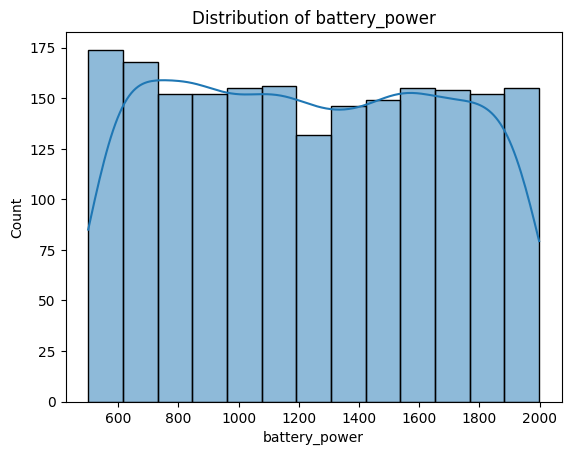

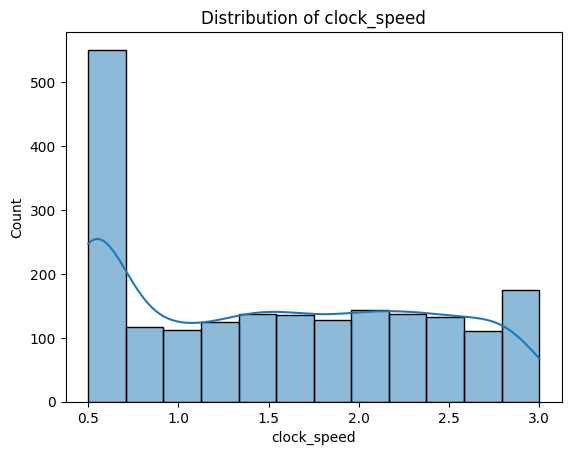

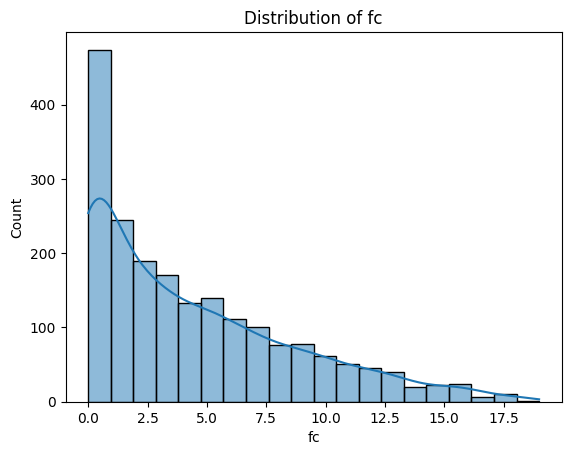

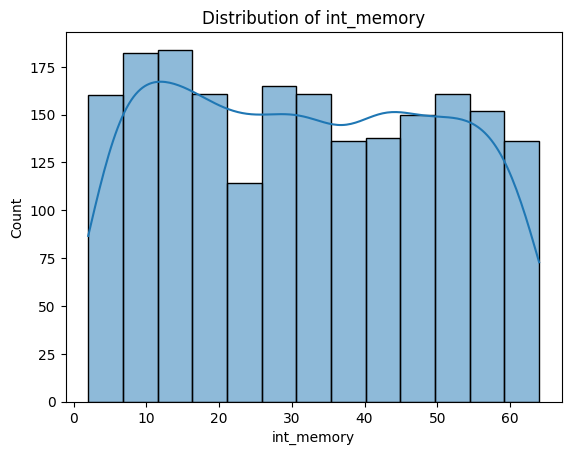

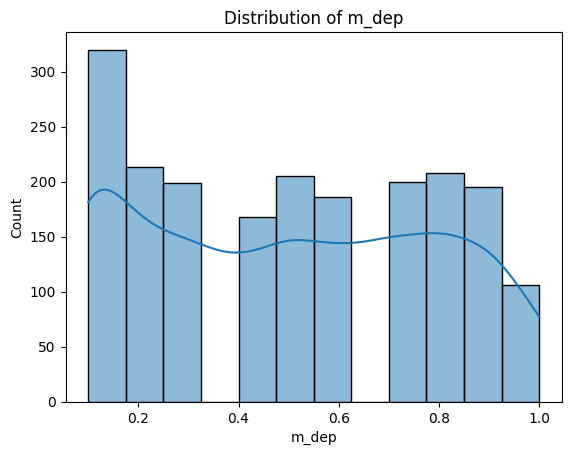

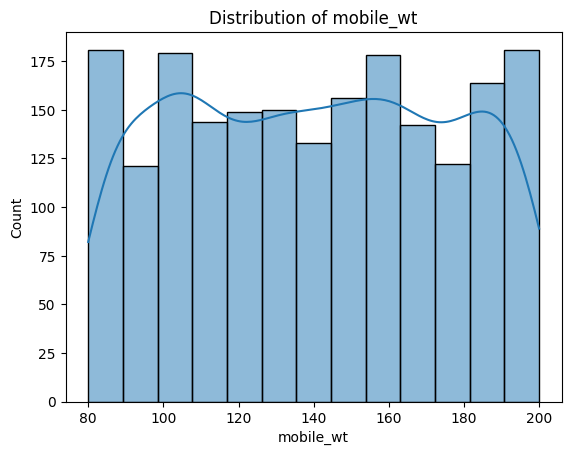

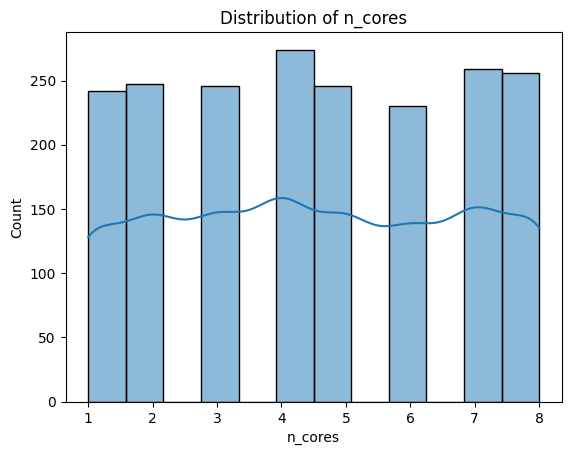

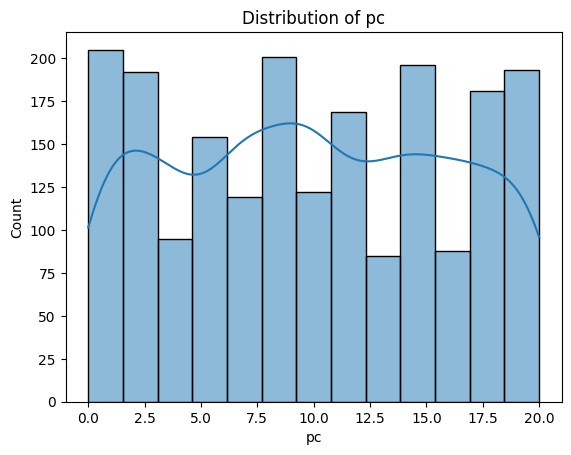

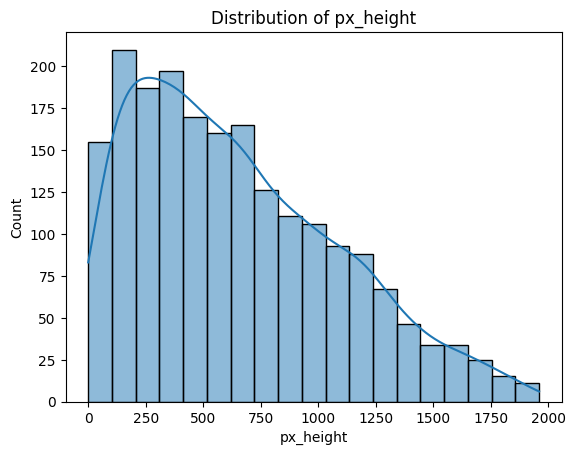

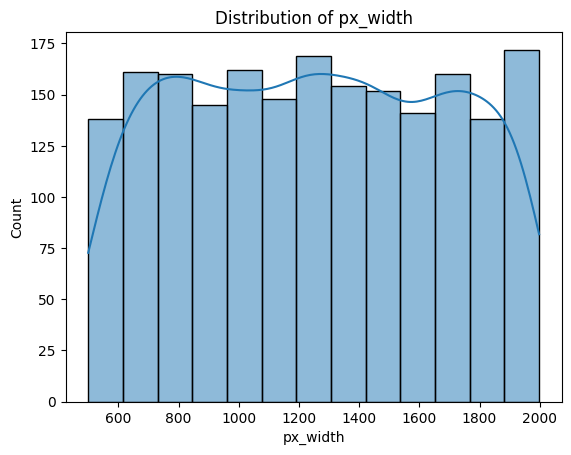

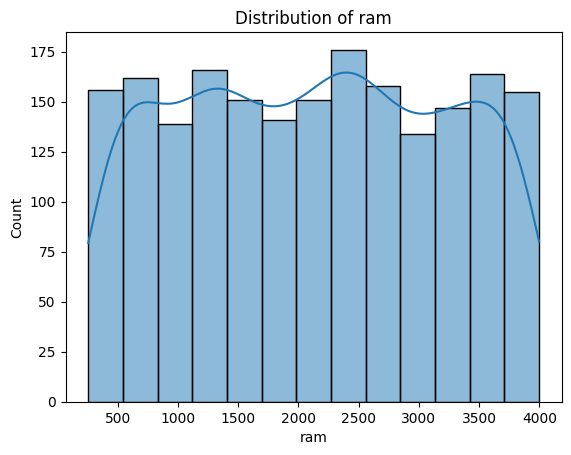

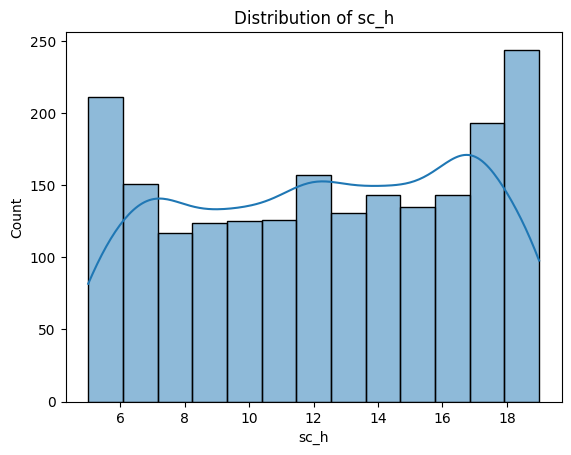

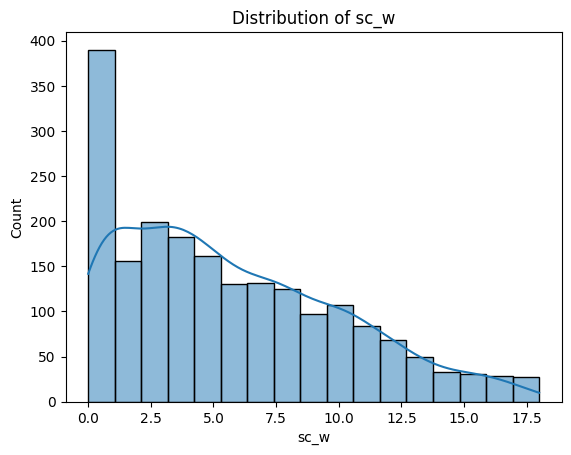

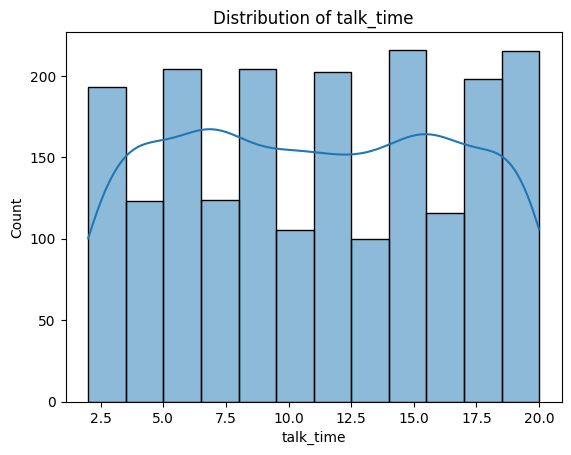

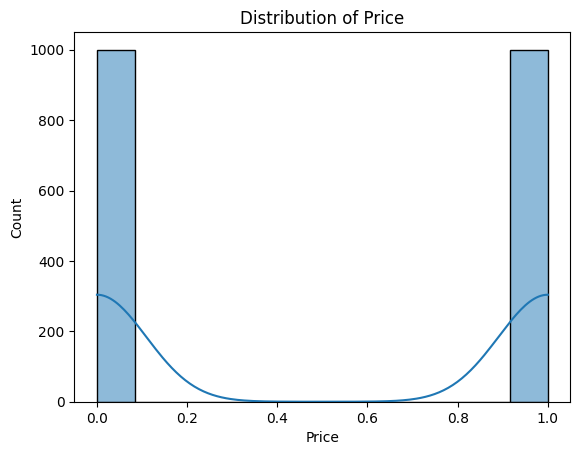

In [6]:
col = df.select_dtypes(include=[int, float])
for y in col:
    sns.histplot(df[y], kde=True)
    plt.title(f'Distribution of {y}')
    plt.show()


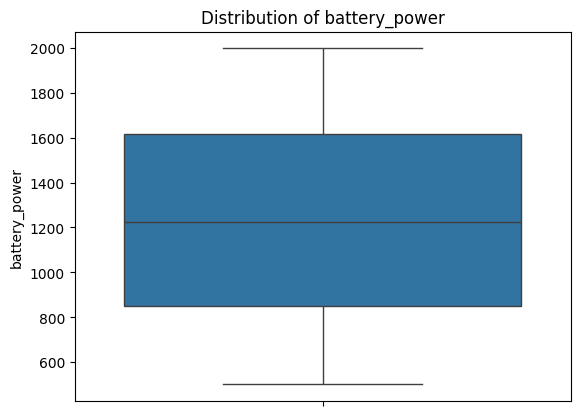

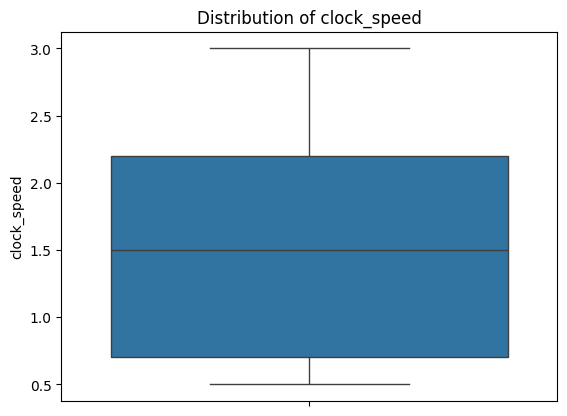

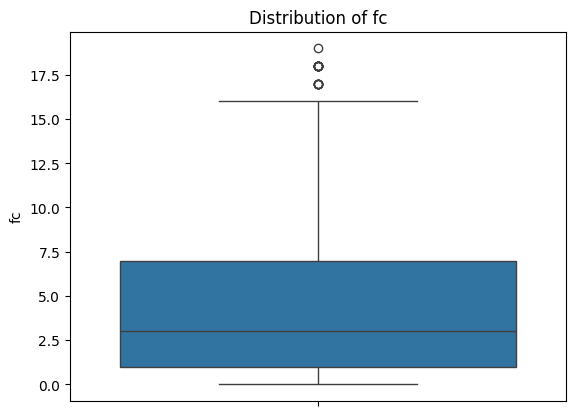

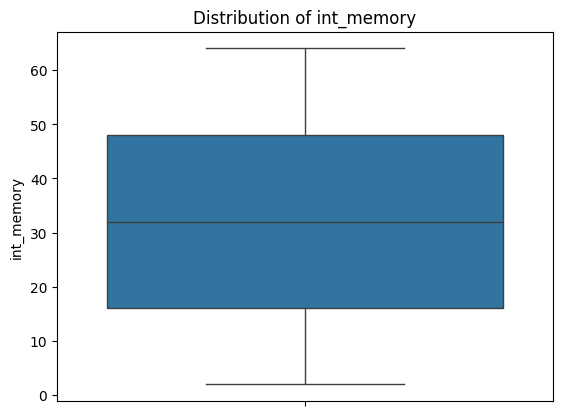

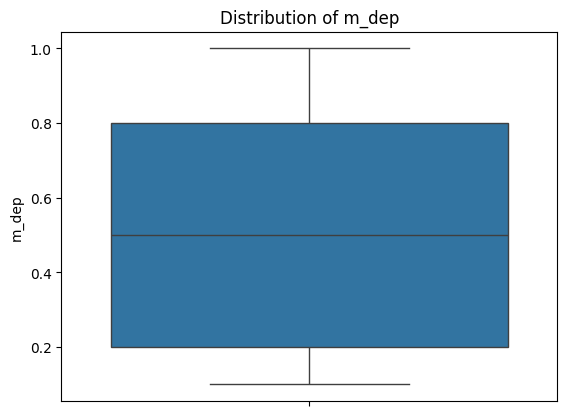

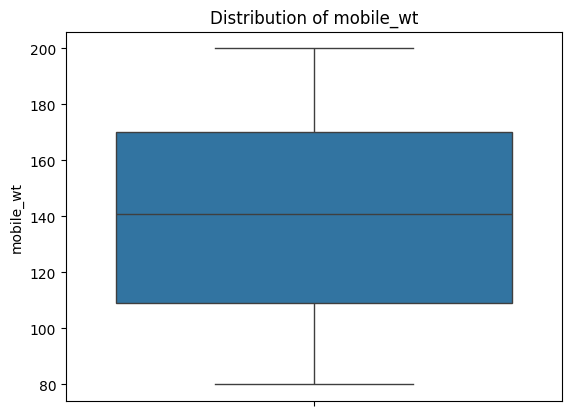

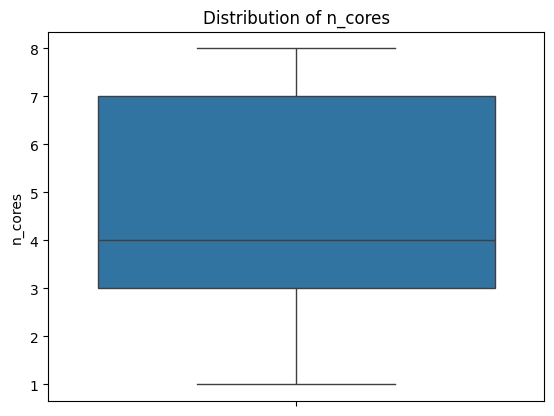

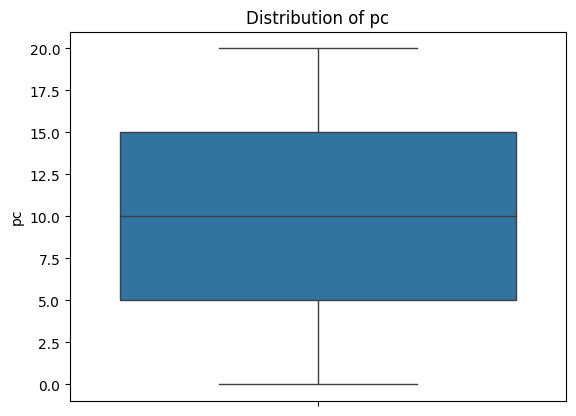

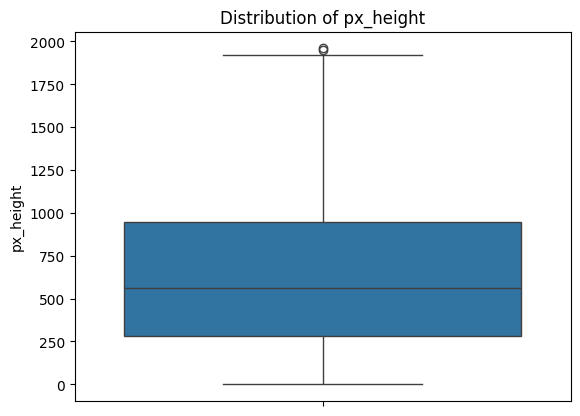

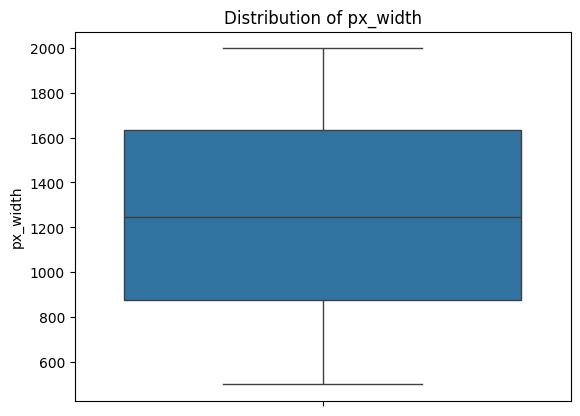

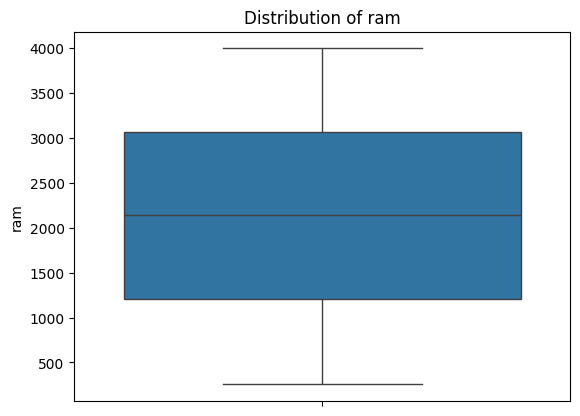

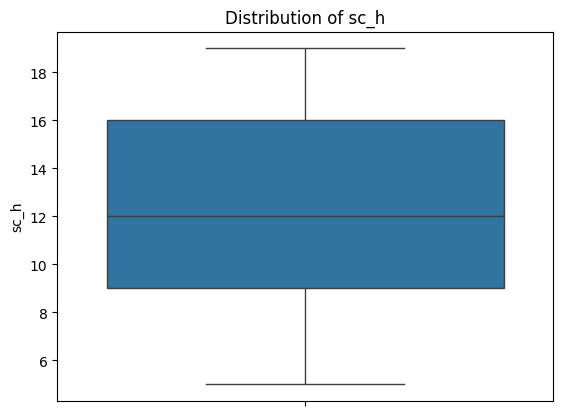

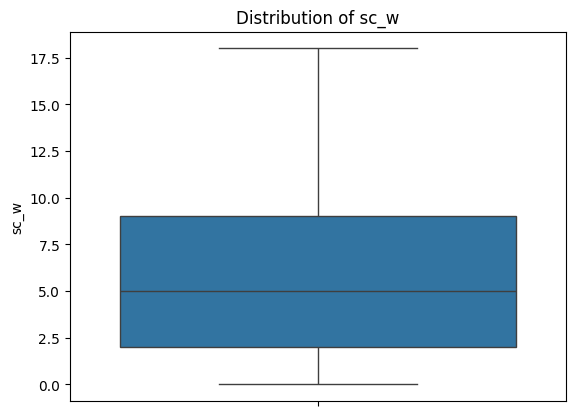

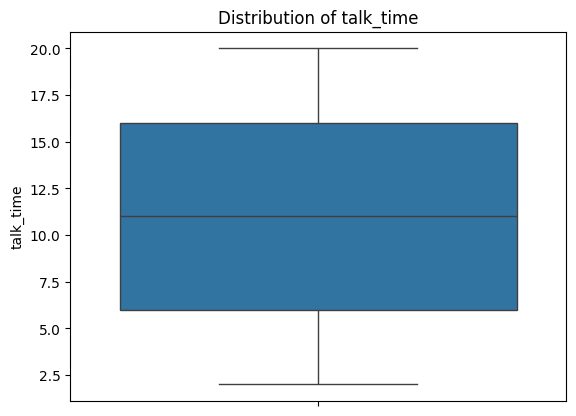

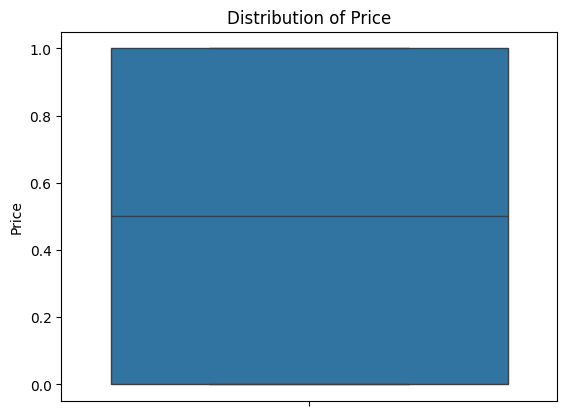

In [7]:
col = df.select_dtypes(include=[int, float])
for y in col:
    sns.boxplot(df[y])
    plt.title(f'Distribution of {y}')
    plt.show()


In [8]:
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'Price'],
      dtype='object')

In [9]:
x = df.drop(columns = "Price")
y = df["Price"]

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=55)

In [11]:
lr = LogisticRegression()


In [12]:
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
print("Train", lr.score(x_train, y_train))
print("Test", lr.score(x_test, y_test))

Train 0.895
Test 0.8875


In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
KNN = KNeighborsClassifier()

In [16]:
KNN.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [17]:
print("Train", KNN.score(x_train, y_train))
print("Test", KNN.score(x_test, y_test))

Train 0.98125
Test 0.9775


In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler  = MinMaxScaler()

In [20]:
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)


In [21]:
lr.fit(x_train_scale, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [22]:
print("Train", lr.score(x_train_scale, y_train))
print("Test", lr.score(x_test_scale, y_test))

Train 0.984375
Test 0.98


In [23]:
knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_scale, y_train)
print("Train",knn.score(x_train_scale,y_train))
print("Test",knn.score(x_test_scale,y_test))

Train 0.921875
Test 0.905


In [24]:
train=[]
test=[]

for i in range (1,50,2):
    knn= KNeighborsClassifier(n_neighbors=i) 
    knn.fit(x_train_scale, y_train)
    train.append(knn.score(x_train_scale,y_train))
    test.append(knn.score(x_test_scale,y_test))

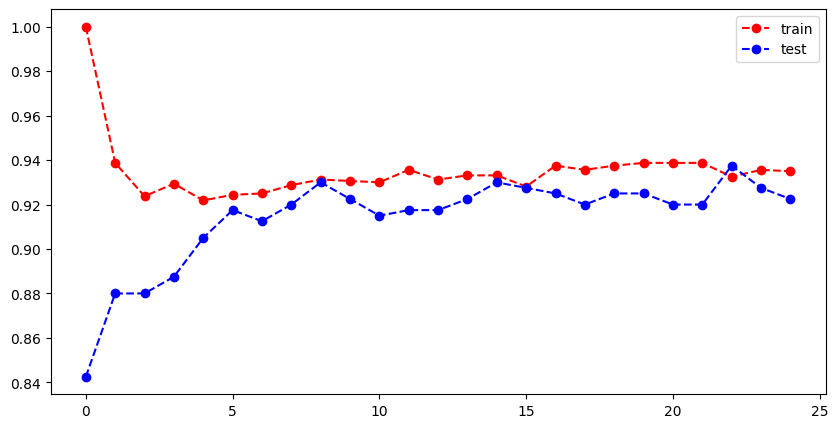

In [25]:
plt.figure(figsize=(10,5))
plt.plot(train, "o--", label="train", color="r")
plt.plot(test, "o--", label="test", color="b")
plt.legend()
plt.show()

In [26]:
print(classification_report(y_train,knn.predict(x_train )))

NameError: name 'classification_report' is not defined